In [2]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
% matplotlib inline
import random
from datetime import datetime
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import copy

In [3]:
df = pd.read_csv("train_users_2.csv")
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [4]:
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df['date_first_booking'] = pd.to_datetime(df['date_first_booking'])
df['date_first_active'] = pd.to_datetime((df.timestamp_first_active // 1000000), format='%Y%m%d')

In [5]:
df_booking = copy.deepcopy(df)
df_booking = df_booking.dropna(how='any',subset=['date_first_booking']) 

Next we will try to plot the link between the day where an account was created and the day the first booking was made primarily in the most general way possible (which would enable us to go deeper into years, months or days and weekdays)

ValueError: Argument 'zs' must be of same size as 'xs' and 'ys' or of size 1.

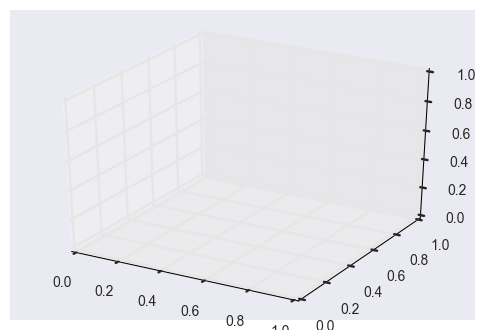

In [22]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df_booking.date_account_created.value_counts().index, df_booking.date_account_created.value_counts().values, df_booking.date_first_booking.value_counts().index)
threedee.set_xlabel('time')
threedee.set_ylabel('nº accounts created')
threedee.set_zlabel('firs booking')
plt.show()

# Correlation between date first booking and destination

In [ ]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df_booking.date_account_created.value_counts().index, df_booking.date_account_created.value_counts().values, df_booking.date_first_booking.value_counts().index)
threedee.set_xlabel('time')
threedee.set_ylabel('nº accounts created')
threedee.set_zlabel('firs booking')
plt.show()

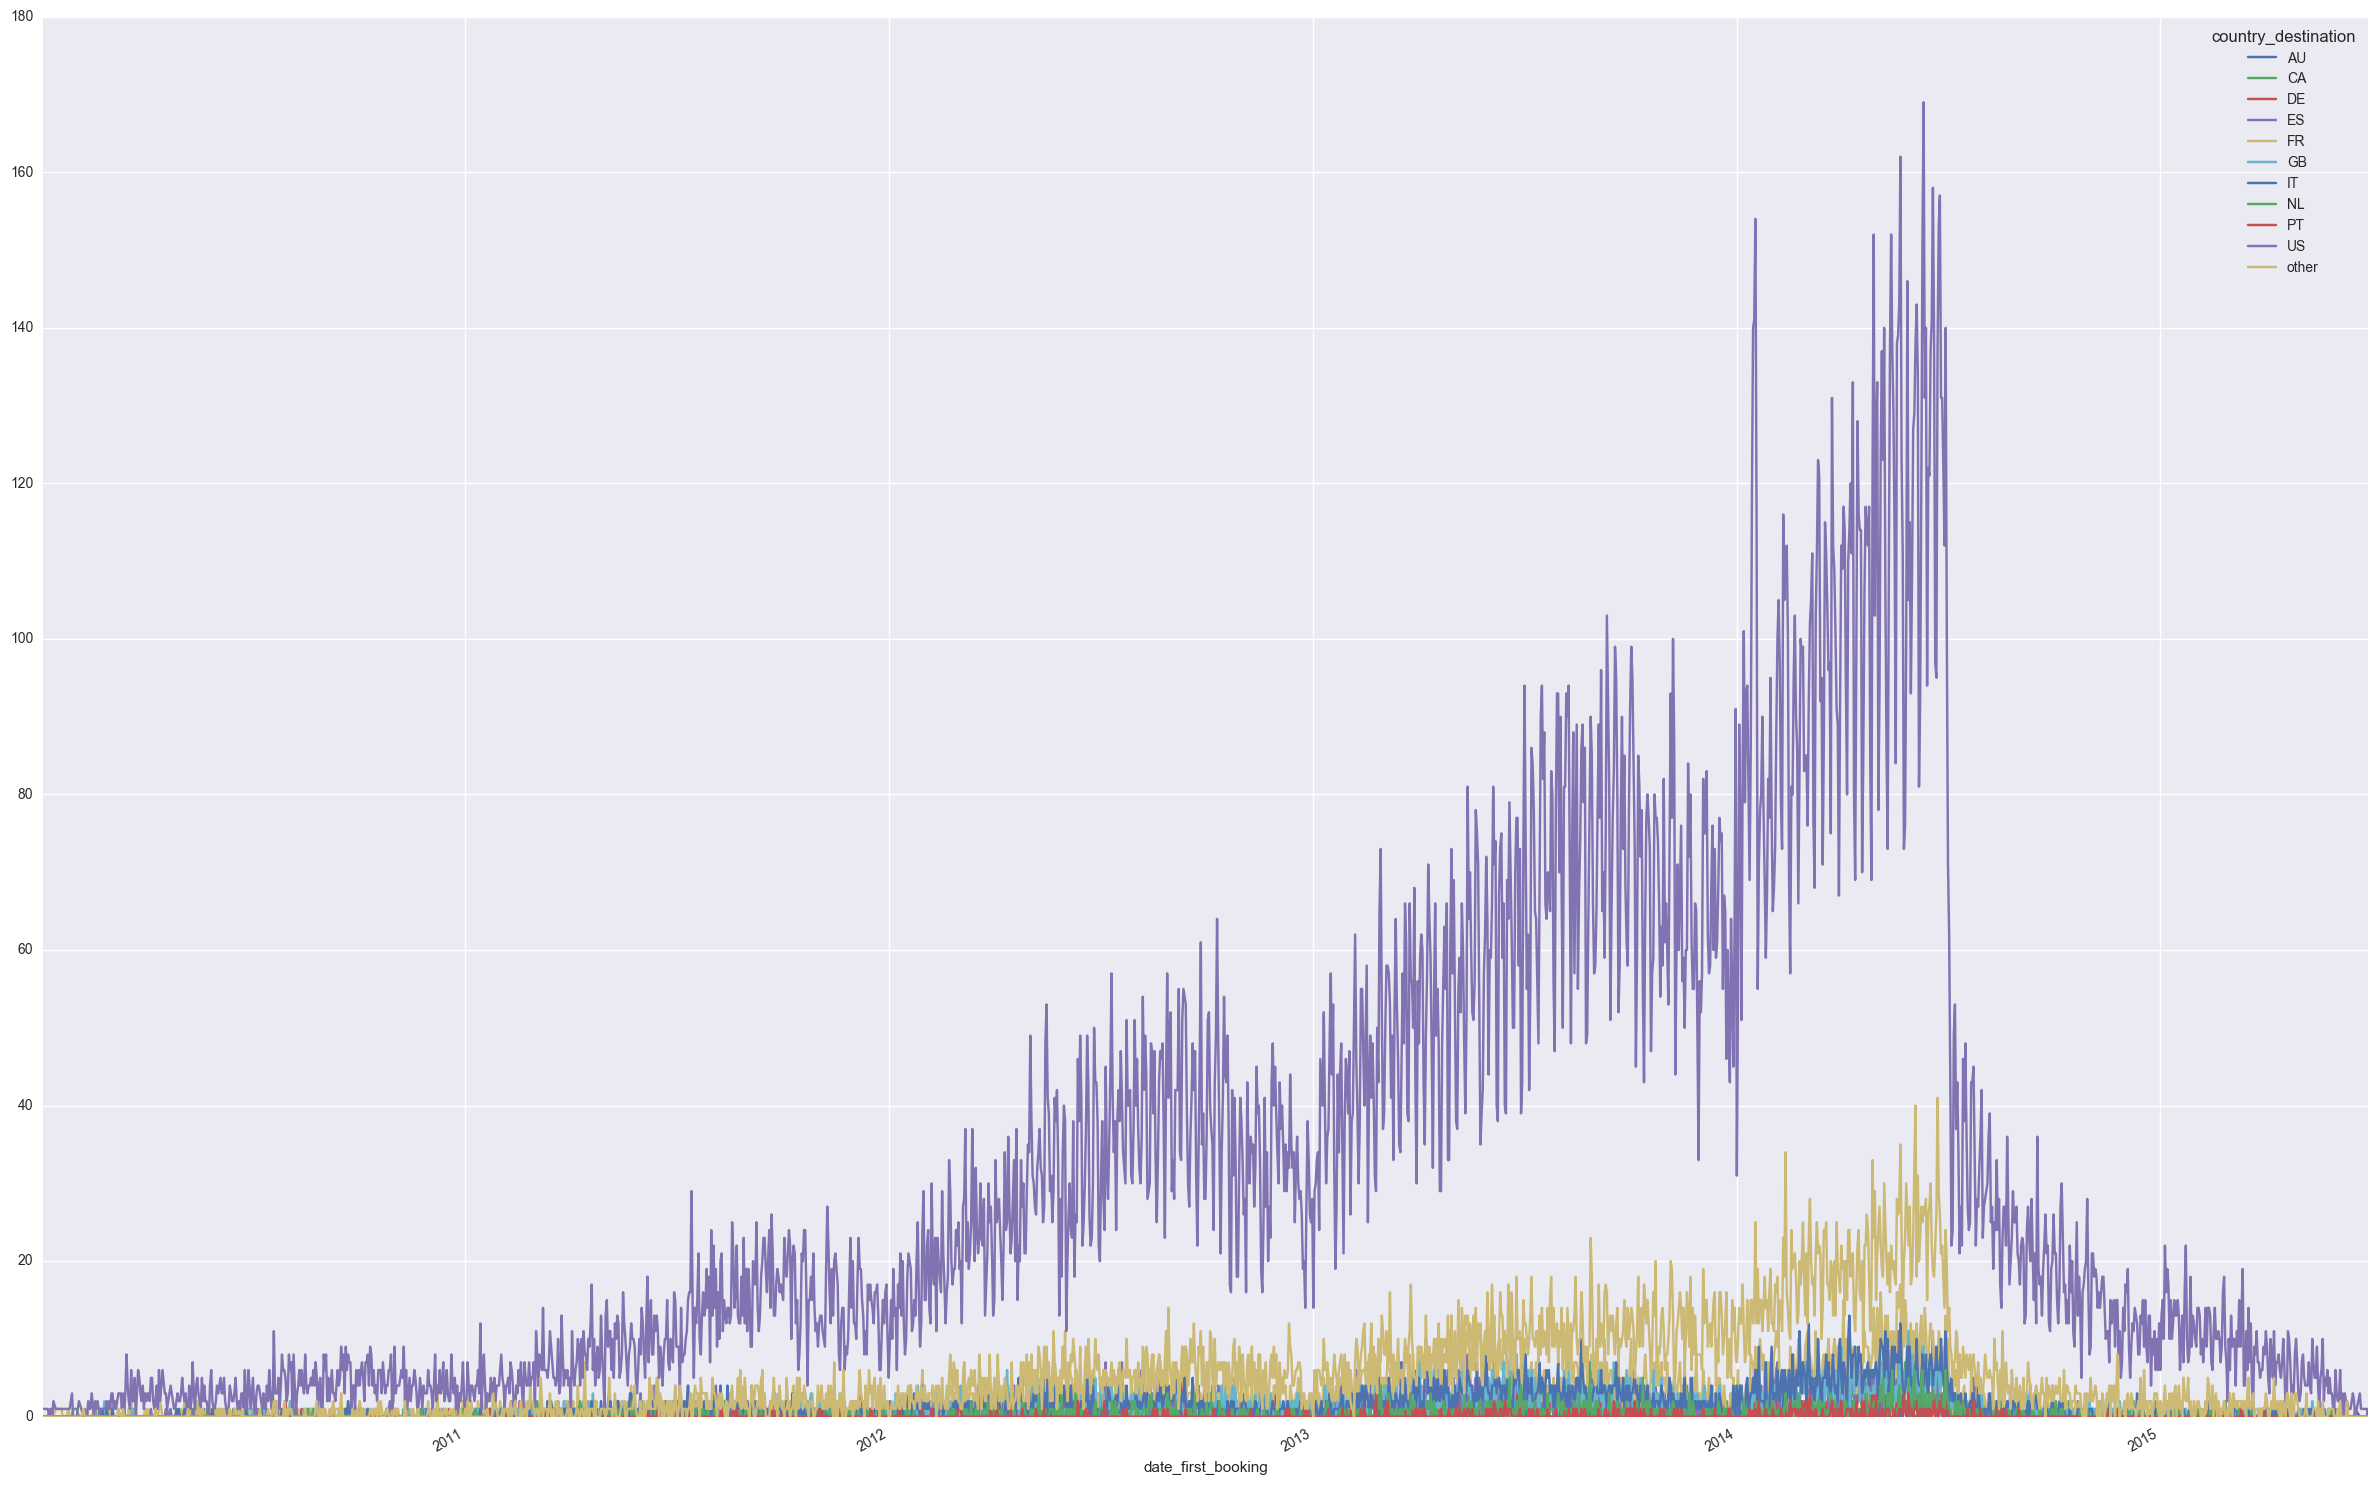

In [13]:
booking_destination = df_booking.groupby(['date_first_booking','country_destination'])['date_first_booking'].count().unstack('country_destination').fillna(0)
booking_destination.plot(kind='line',figsize=(30,20))
plt.show()

In [17]:
booking_destination.describe()

country_destination,AU,CA,DE,ES,FR,GB,IT,NL,PT,US,other
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,0.272773,0.722672,0.536943,1.138158,2.542004,1.176113,1.434717,0.385628,0.109818,31.566802,5.108300
std,0.592773,1.188984,0.932481,1.645444,2.931498,1.630828,2.020099,0.767753,0.356615,32.686181,6.272174
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,19.000000,3.000000
75%,0.000000,1.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,48.000000,8.000000
max,4.000000,8.000000,6.000000,12.000000,17.000000,11.000000,13.000000,7.000000,3.000000,169.000000,41.000000
